In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df1 = pd.read_csv("G:\Others\Data Science - TYPE A\Guvi\Assignment\Task 5\\takehome_user_engagement.csv",encoding='latin-1')

In [43]:
df2 = pd.read_csv("G:\Others\Data Science - TYPE A\Guvi\Assignment\Task 5\\takehome_users.csv",encoding='latin-1')

In [44]:
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [45]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [46]:
df2 = df2.dropna()
df1 = df1.dropna()

In [47]:
df2.shape, df1.shape

((4776, 10), (207917, 3))

In [48]:
many_visits = []
daysgap = []
for i in range(0,df1.shape[0]-1):
    days = (pd.Timestamp(df1['time_stamp'][i])-pd.Timestamp(df1['time_stamp'][i+1])).days
    if days < 7 and days > -7:
        many_visits.append(1)
        daysgap.append(days)
    else:
        many_visits.append(0)
        daysgap.append(days)
            

In [49]:
many_visits.append(0)
daysgap.append(603)

In [50]:
df1['frequent_visits'] = many_visits
df1['days_gap'] = daysgap

In [51]:
df1.user_id.nunique()

8823

In [52]:
df1 = df1.drop_duplicates(subset='user_id', keep="last")

In [53]:
df1.rename(columns={'user_id':'object_id'},inplace=True)

In [54]:
df1.shape, df2.shape

((8823, 5), (4776, 10))

In [55]:
df = df2.merge(df1, on=['object_id'], how='inner')

In [56]:
df.shape

(4776, 14)

In [57]:
df.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
time_stamp                    0
visited                       0
frequent_visits               0
days_gap                      0
dtype: int64

In [58]:
ratio = df['frequent_visits'].value_counts()[1]/df['frequent_visits'].value_counts()[0]
print("The ratio of future user to non future user:", ratio)
print(f"i.e: 100:{round(100*ratio)}")

The ratio of future user to non future user: 0.020949123557075674
i.e: 100:2


In [59]:
df['domain'] = df['email'].apply(lambda x: x.split('@')[1])

In [60]:
from sklearn.preprocessing import LabelEncoder
label_enco = LabelEncoder()
df['creation_source'] = label_enco.fit_transform(df['creation_source'])
df['domain'] = label_enco.fit_transform(df['domain'])

In [61]:
df = df.drop(columns=['name','visited','days_gap','email','object_id'])

In [62]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

In [63]:
df['creation_time_year'] = df['creation_time'].dt.year
df['creation_time_month'] = df['creation_time'].dt.month
df['creation_time_week'] = df['creation_time'].dt.week
df['creation_time_day'] = df['creation_time'].dt.day
df['creation_time_hour'] = df['creation_time'].dt.hour
df['creation_time_minute'] = df['creation_time'].dt.minute

C:\Users\Shaiz!!\AppData\Local\Temp/ipykernel_5180/2730713424.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['creation_time_week'] = df['creation_time'].dt.week


In [64]:
df['time_stamp_year'] = df['time_stamp'].dt.year
df['time_stamp_month'] = df['time_stamp'].dt.month
df['time_stamp_week'] = df['time_stamp'].dt.week
df['time_stamp_day'] = df['time_stamp'].dt.day
df['time_stamp_hour'] = df['time_stamp'].dt.hour
df['time_stamp_minute'] = df['time_stamp'].dt.minute

C:\Users\Shaiz!!\AppData\Local\Temp/ipykernel_5180/1213337900.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['time_stamp_week'] = df['time_stamp'].dt.week


In [65]:
df = df.drop(columns=['creation_time','time_stamp'])

In [66]:
x = df.drop(columns=['frequent_visits'])
y = df['frequent_visits']

In [67]:
from imblearn.under_sampling import RandomUnderSampler
rex = RandomUnderSampler()
x,y = rex.fit_resample(x,y)

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_tets = train_test_split(x,y,test_size=0.3,random_state=1)

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
pred = model.predict(x_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_tets,pred)

0.5423728813559322

In [72]:
features = df.drop('frequent_visits', axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)

In [99]:
features

Index(['creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id', 'domain', 'creation_time_year',
       'creation_time_month', 'creation_time_week', 'creation_time_day',
       'creation_time_hour', 'creation_time_minute', 'time_stamp_year',
       'time_stamp_month', 'time_stamp_week', 'time_stamp_day',
       'time_stamp_hour', 'time_stamp_minute'],
      dtype='object')

In [ ]:
plt.pie(indices)

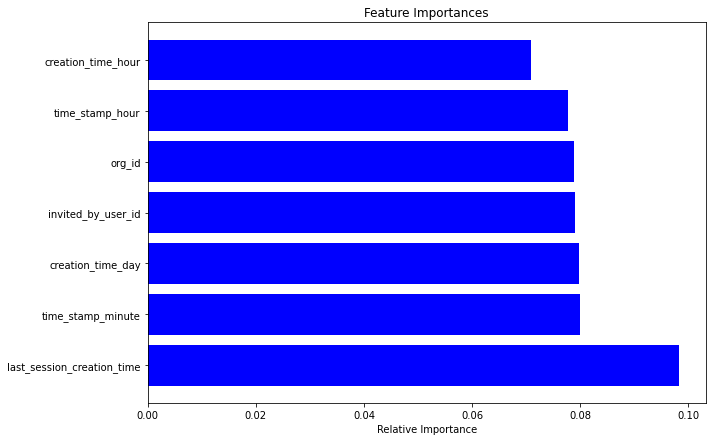

In [94]:
plt.figure(figsize=(10,7))
plt.title('Feature Importances')
plt.barh(range(len(indices[-1:-8:-1])), importances[indices[-1:-8:-1]], color='b', align='center')
plt.yticks(range(len(indices[-1:-8:-1])), [features[i] for i in indices[-1:-8:-1]])
plt.xlabel('Relative Importance')
plt.savefig('feature_importance.png')
plt.show()